Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>DSP.03 Convolution and Filtering - Time Domain</font>

# <font color=red>Give it a Try!</font>
# <font color=red>Part 4</font>

### Setup

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img
from matplotlib import cm
from mpl_toolkits import mplot3d
from scipy.fft import fft, fftfreq
import matplotlib.patches as patches
import math
import cmath
import pandas as pd
from sympy import Symbol, sin, series
from sympy import roots, solve_poly_system
import scipy.special

import warnings
warnings.filterwarnings('ignore')

# Figure size 
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b",linewidth = 1): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#three overlaid waveforms with red, blue and green   
def make_plot_3(x1,y1,type1,x2,y2,type2,x3,y3,type3): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.plot(x3, y3, type3)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
def make_plot_3d(ax,x,y,z):    
    ax.contour3D(x, y, z, 50, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
def make_plot_freq_1(x1,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / sample_rate)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf))
    
#two spectrums
def make_plot_freq_2(x1,x2,sample_rate, duration=1): 
    N = sample_rate * duration
    Nhalf = math.ceil(N/2)
    yf1 = fft(x1)
    yf2 = fft(x2)
    xf = fftfreq(N, 1 / sample_rate)

    yf1 = yf1[0:Nhalf]
    yf2 = yf2[0:Nhalf]
    xf = xf[0:Nhalf]

    plt.plot(xf, np.abs(yf1))
    plt.plot(xf, np.abs(yf2), color = 'r')
    
def make_imshow(x):
    plt.imshow(x,cmap='Greys_r')
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def make_imshow_color(x):
    plt.imshow(x)
    plt.tick_params(labelbottom = False, bottom = False)
    plt.tick_params(labelleft = False, left = False)
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))

## <font color=red>DSP.03.G4) Global Warming - Gain Plots</font>

### <font color=red>DSP.03.G4.a) Computing gain plots</font>

Data for this example were obtained from the NASA Goddard Institute for Space Studies (New York).

http://data.giss.nasa.gov/gistemp/2005/
    
In the tutorial section we took a look at a dataset of the global mean land-ocean temperature index
from1880 to 2005 (temperatures in this
study were based on surface air measurements at meteorological stations and ship and satellite
measurements for sea surface temperature).

Load in the data: 

In [2]:
import tkinter as tk
from tkinter import filedialog

root = tk.Tk()
root.withdraw()

#find and select file "Globalwarming.txt"
file_path = filedialog.askopenfilename()
Globalwarming = pd.read_csv(file_path,delimiter = "\t")
Globalwarming = Globalwarming.to_numpy().flatten()
Globalwarming

array([-0.25, -0.2 , -0.23, -0.24, -0.3 , -0.3 , -0.25, -0.35, -0.26,
       -0.15, -0.37, -0.28, -0.32, -0.32, -0.33, -0.27, -0.17, -0.12,
       -0.25, -0.17, -0.1 , -0.16, -0.27, -0.31, -0.34, -0.25, -0.2 ,
       -0.39, -0.34, -0.36, -0.34, -0.34, -0.34, -0.32, -0.16, -0.09,
       -0.31, -0.4 , -0.33, -0.2 , -0.19, -0.14, -0.24, -0.21, -0.22,
       -0.16, -0.02, -0.14, -0.12, -0.25, -0.07, -0.02, -0.06, -0.18,
       -0.05, -0.11, -0.04,  0.08,  0.11,  0.02,  0.05,  0.1 ,  0.03,
        0.1 ,  0.2 ,  0.07, -0.04,  0.01, -0.04, -0.06, -0.15, -0.04,
        0.03,  0.11, -0.1 , -0.1 , -0.17,  0.08,  0.08,  0.06, -0.01,
        0.08,  0.04,  0.08, -0.2 , -0.11, -0.03,  0.  , -0.04,  0.08,
        0.03, -0.1 ,  0.  ,  0.14, -0.08, -0.05, -0.16,  0.13,  0.01,
        0.09,  0.18,  0.27,  0.05,  0.26,  0.09,  0.06,  0.13,  0.26,
        0.31,  0.19,  0.38,  0.35,  0.12,  0.14,  0.23,  0.38,  0.3 ,
        0.39,  0.56,  0.32,  0.33,  0.48,  0.56,  0.55,  0.48,  0.62])

Now plot the data.

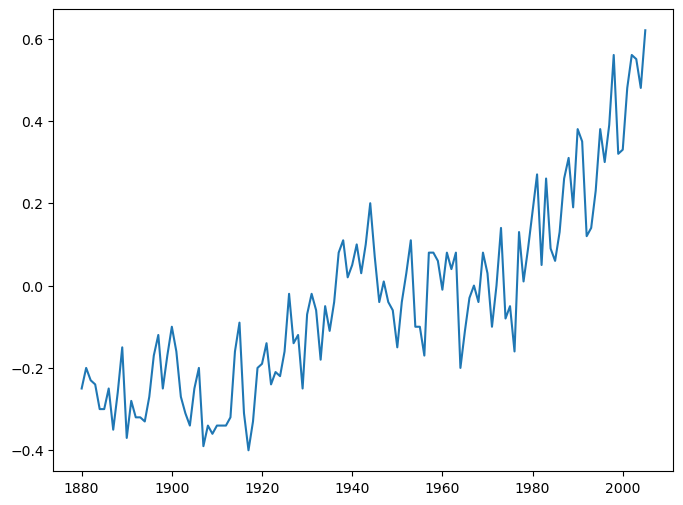

In [3]:
years = np.arange(1880,2006)

# Plotting time vs amplitude using plot function from pyplot
plt.plot(years, Globalwarming)

# Finally displaying the plot
plt.show() 

Temperature readings start in 1880 and end in 2005.
In the Basics we used a kernel of 11 values to smooth the data.

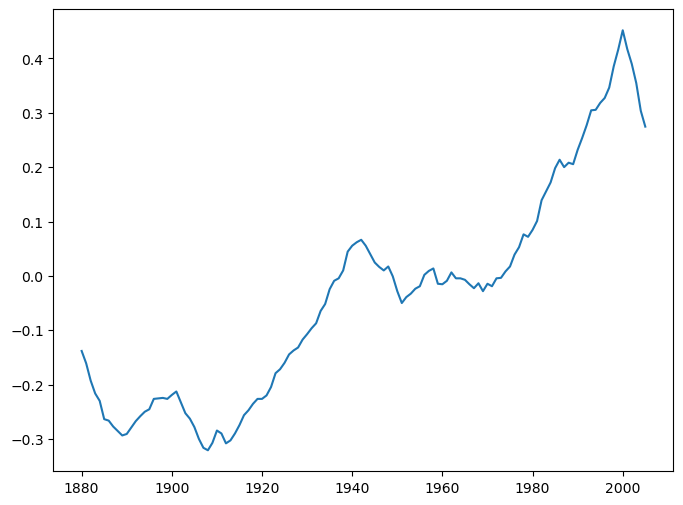

In [4]:
from scipy import signal

kernel = 1/11 * np.ones(11)
Globalwarming_filtered = signal.convolve(Globalwarming,kernel,mode='same')

# Plotting time vs amplitude using plot function from pyplot
plt.plot(years, Globalwarming_filtered)

# Finally displaying the plot
plt.show() 

Compare the original timeseries and the above filtered timeseries.

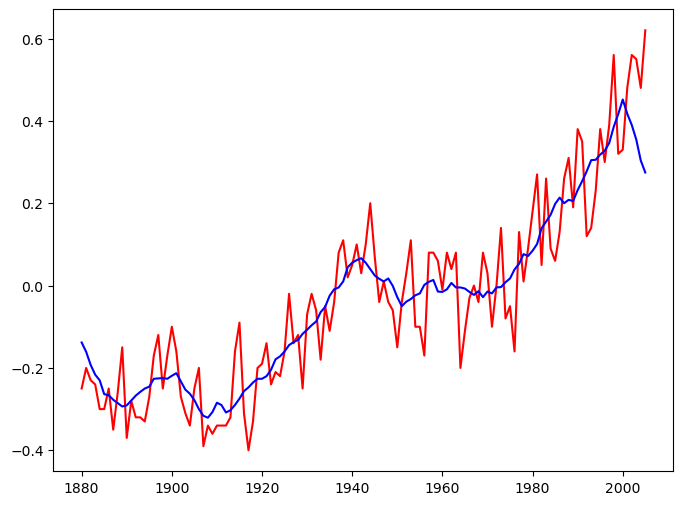

In [5]:
# Plotting time vs amplitude using plot function from pyplot
plt.plot(years, Globalwarming, color = "r")
plt.plot(years, Globalwarming_filtered, color = "b")

# Finally displaying the plot
plt.show() 

Low-frequency information is retained and some of the high-frequency activity removed.

No other work do to here. Move to the next section.

### <font color=red>DSP.03.G4.b) Create a gain plot</font>

The data were filtered using a 11 point kernel with all values = 1/11 .

Use complex exponentials to calculate the gain plot for a 10 point moving average filter.

To get you started, note that the moving average kernel is expressed as 1/11 {1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1} ,
and the kernel was convolved with a set of eleven unfiltered datapoints. Represent these datapoints in
time as t = -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5.

Take the unfiltered timeseries as an eigenfunction in the complex form $e^{iωt}$ of frequency ω. To do this,
replace the 1s in the kernel with the complex exponential term $e^{iωt}$ to get
1/11 {$e^{iωt}$, $e^{iωt}$, $e^{iωt}$, $e^{iωt}$, $e^{iωt}$,$e^{iωt}$, $e^{iωt}$, $e^{iωt}$, $e^{iωt}$, $e^{iωt}$,$e^{iωt}$} . Next, add in the time values t = -5, -4, -3, -2, -1,
0, 1, 2, 3, 4, 5 to get 1/11 {$e^{iω-5}$, $e^{iω-4}$, $e^{iω-3}$, $e^{iω-2}$, $e^{iω-1}$,$e^{iω0}$, $e^{iω1}$, $e^{iω2}$, $e^{iω3}$, $e^{iω4}$,$e^{iω5}$} .

Using Euler's Identities, you take it from here.

### <font color=red>DSP.03.G4.c) Calculating gain</font>

Take a look at the gain plot below for a 5 point, 9 point, and 19 point moving-average transfer function.

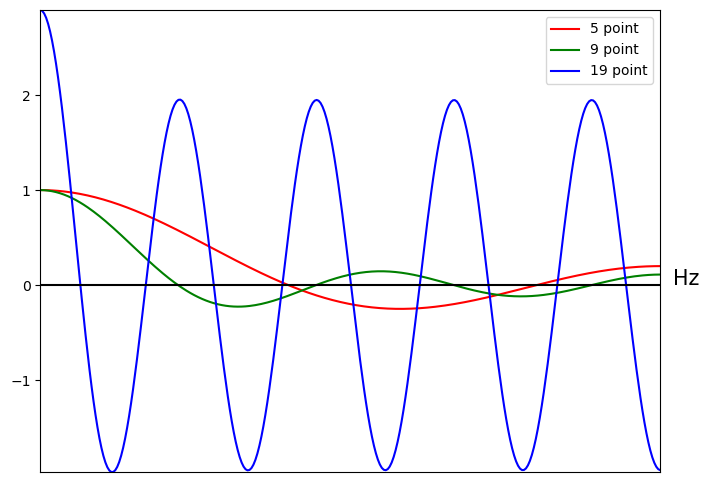

In [6]:
omega = np.arange(0,np.pi,0.01)
freq = omega / (2*np.pi)

# Finding amplitude at each time
timeseries1 = 1/5 * (1 + 2 * np.cos(omega) + 2 * np.cos(2*omega))
timeseries2 = 1/9 * (1 + 2 * np.cos(omega) + 2 * np.cos(2*omega) + 2 * np.cos(3*omega) + 2 * np.cos(4*omega))
timeseries3 = 1/19 * (1 + 2 * np.cos(omega) + 2 * np.cos(2*omega) + 2 * np.cos(3*omega) + 2 * np.cos(4*omega) + \
                    + 2 * np.cos(5*omega) + 2 * np.cos(6*omega) + 2 * np.cos(7*omega) + 2 * np.cos(8*omega)) + \
                    + 2 * np.cos(9*omega)

make_plot_3(freq, timeseries1,"r",freq, timeseries2,"g",freq, timeseries3,"b")
plt.text(0.51,0,'Hz',fontsize=15)
plt.legend(["5 point", "9 point", "19 point"], loc="upper right")

Note the colors in the plot's legend, then answer the following statements (highlight the correct answer) in each of these 4 questions:
    
When more terms are added to the moving average kernel, more / less high-frequency activity is
removed.

When more terms are added to the moving average kernel, the transition band is more / less narrow.

When more terms are added to the moving average kernel, more / less activity at specific frequencies is
completely removed.

When more terms are added to the moving average kernel, the transfer function values are squeezed
closer to / further from the x axis.

### <font color=red>DSP.03.G4.d) Calculating gain</font>

Take another look at the gain plot.

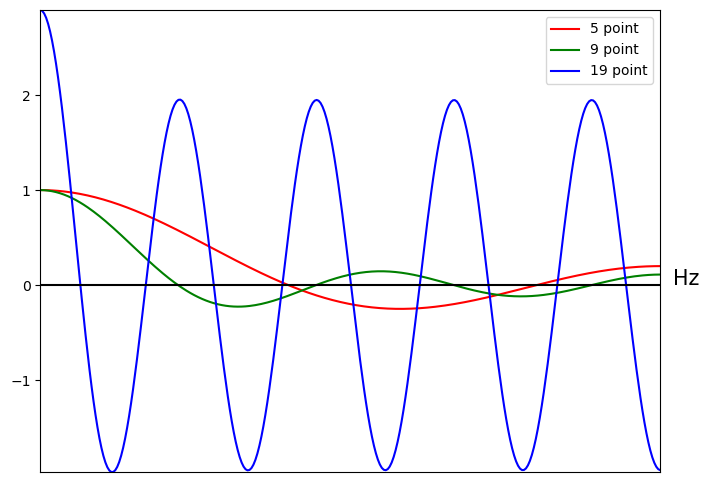

In [7]:
make_plot_3(freq, timeseries1,"r",freq, timeseries2,"g",freq, timeseries3,"b")
plt.text(0.51,0,'Hz',fontsize=15)
plt.legend(["5 point", "9 point", "19 point"], loc="upper right")

Write a sentence or two describing trade-offs between using a kernel with few versus many values.